# สถิติเชิงพรรณนา

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.mean()

/var/folders/gz/r2x74xbj2tn_9131y1mkcb6m0000gn/T/ipykernel_49157/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

In [4]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [5]:
df.tip.median()

2.9

## การกระจายตัว
dispersion เป็นการวัดว่าข้อมูลกระจายัวรอบค่ากลางอย่างไร

    มาตรวัด
        - ความแปรปรวน (variance)
                เริ่มต้นมาจาก error คือผลต่างระหว่างค่าจริงกับค่าเฉลี่ย
                ex sum(x,i - x,bar )
        - ส่วนเบี่ยงเบนมาตรฐาน (standard deviation) : เอาความแปรปวนมาถอดราก
        - พิสัย (range : ค่ามากสุด - ค่าน้อยสุด
        - inter-quartile range (IQR)

## var() , std()
    ในการคำนวณหาความแปรปรวนและส่วนเบี่ยงเบนมาตรฐาน
    ทั้งสองคำสั่งใช้ option ddof (degree of freedom) ได้
    ddof = 0 เมื่อคำนวณค่าของ population และ 1 เมื่อคำนวณค่าของ sample
    ใน excel / sheets จะใช้ var.p() และ std.p()
        p ในfunc var และ std หมายถึง population 
        s ในfunc var และ std หมายถึง sample 

In [6]:
df.tip - df.tip.mean()

0     -1.988279
1     -1.338279
2      0.501721
3      0.311721
4      0.611721
         ...   
239    2.921721
240   -0.998279
241   -0.998279
242   -1.248279
243    0.001721
Name: tip, Length: 244, dtype: float64

In [7]:
(df.tip - df.tip.mean()).sum()

1.1013412404281553e-13

## variance

In [8]:
((df.tip - df.tip.mean())**2)

0      3.953252
1      1.790990
2      0.251724
3      0.097170
4      0.374203
         ...   
239    8.536455
240    0.996560
241    0.996560
242    1.558200
243    0.000003
Name: tip, Length: 244, dtype: float64

In [9]:
((df.tip - df.tip.mean())**2).mean()

1.9066085124966412

In [10]:
df.tip.var()

1.9144546380624725

## Standdard deviation 

In [11]:
df.tip.var(ddof=0) #ddof = degree of freedom

1.9066085124966428

In [12]:
df.tip.var(ddof=0)**0.5

1.3807999538298958

In [13]:
df.tip.std(ddof=0)

1.3807999538298958

# มาตรวัดเกี่ยวกับลำดับ
   ## rank ของข้อมูลคือลำดับของข้อมูล เมื่อเรียงข้อมูลทั้งหมดจากน้อยไปมาก
   ## pecentile

## rank

In [14]:
df1 = pd.concat([df.tip,df.tip.rank()],axis=1)
df1.columns = ['tip','rank']
df1

,tip,rank
0,1.01,5.0
1,1.66,33.0
2,3.50,177.0
3,3.31,165.0
4,3.61,185.0
...,...,...
239,5.92,236.0
240,2.00,62.0
241,2.00,62.0
242,1.75,38.0


In [15]:
df.tip.rank(pct=True) # pct = percent

0      0.020492
1      0.135246
2      0.725410
3      0.676230
4      0.758197
         ...   
239    0.967213
240    0.254098
241    0.254098
242    0.155738
243    0.553279
Name: tip, Length: 244, dtype: float64

# Quantile() and Percentile()

In [16]:
df.tip.quantile(0.55) # (%)

3.0

ต้อง tip เท่าไหร่ถึงจะได้ไปอยู่ในตำแหน่งของ 55 %

In [17]:
df.tip.quantile(0.90)

5.0

ถ้าต้องการอยู่ในลำดับ 90% จะต้องได้ tip เท่าไหร่
คำตอบถือ tip = 5.0

In [18]:
df.tip.quantile(0.99)

7.214499999999995

In [19]:
df.tip.quantile(0.88)

4.7036

# Inter Quartile range(IQR)
    percentile 0 = ค่าต่ำสุด
    prcentile 25 = Quartile ที่ 1th
    percentile 50 = median(มัธยฐาน) = Quartile ที่ 2th
    prcentile 75 : ต่ำกว่าค่านี้ = Quartile ที่ 3th
    percentile 100 = ค่าสูงสุด
    
    Q1,2,3 คือค่าที่แบ่งข้อมูลเป็น 4 ส่วนเท่าๆกันตรงกับ percentile ที่ 25,50,75 ตามลำดับ
    
    - inter-quartile range คือค่าของ quartile ที่ 3 ลบด้วยค่า quartile ที่ 1 
    ** จะทนต่อ outliner มากกว่า range ปกติ 
    ใช้วัดการกระจายตัวของข้อมูล 50% ช่วงตรงกลางได้

In [20]:
df.tip.quantile([0.75,0.25])

0.75    3.5625
0.25    2.0000
Name: tip, dtype: float64

In [21]:
df.tip.quantile(0.75) - df.tip.quantile(0.25)

1.5625

# Box-plot

In [22]:
import seaborn as sns

<Axes: >

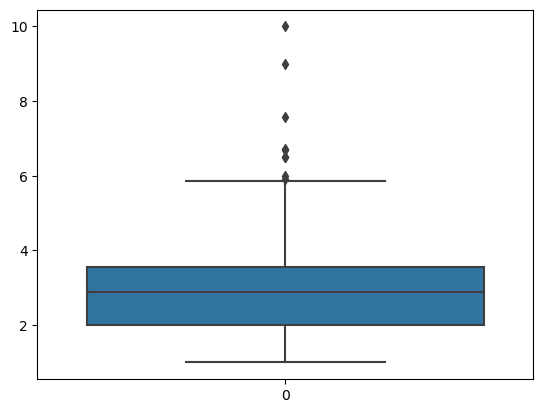

In [23]:
sns.boxplot(df.tip)

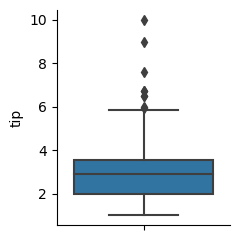

In [24]:
sns.catplot(df,y='tip',kind='box',height=2.5)

    - กล่องสีฟ้า
    ขอบบนของกล่องเป็น pct = 75
    ขอบล่างของกล่องเป็น pct = 25
    เส้นกลางตรงกลางคือ medien
    ในกล่องครอบคลุม 50%
    
    - เส้นแนวตั้งจะเรียกว่า visker จะเป็นแนวที่ระบุค่าปกติ
    คำนวณจากความกว้างของกลาง * 1.5 
    - จุดๆ เป็นเหมือนตัวแทน outliner 

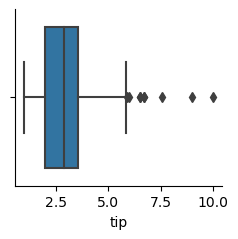

In [25]:
sns.catplot(df,x='tip',kind='box',height=2.5)

In [26]:
df.tip.sort_values(ascending=False).head(10)

170    10.00
212     9.00
23      7.58
59      6.73
141     6.70
214     6.50
183     6.50
47      6.00
239     5.92
88      5.85
Name: tip, dtype: float64

In [27]:
(df.tip.quantile(0.75)-df.tip.quantile(0.25))*1.5

2.34375

In [28]:
df.tip.quantile(0.75)+2.34375

5.90625

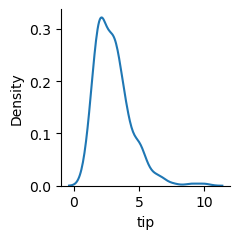

In [29]:
sns.displot(df.tip,kind='kde',height=2.5)

# การตีความ box plot และ histogram
    กล่อง boxplot แสดงข้อมูล 50 % ตรงกลางและเส้น median แบ่งข้อมูลนี้ออกเป็น 25% อีกสองส่วน
    
    เส้นหนวด (whisker) แสดงการยืดออกไปของ "หาง"

# Correlation

    สหสัมพันธ์ คือความสัมพันธ์ทางสถิติระหว่างตัวแปรสองตัว
        -เมื่อตัวแปรหนึ่งเปลี่ยนไป ตัวแปรอีกตัวจะเปลี่ยนไปอย่างไร
        -คู่ตัวแปรที่มีค่าสหสัมพันธ์สูงสามารถใช้เป็นฟีเจอร์ในการสร้างโมเดลอธิบายหรือทำนายกันได้
        
    มาตรวัด
    pearson's product-moment correlation coefficient (r): input number , output number 
        -ความสัมพันธ์ระหว่างตัวแปรเป็นเส้นตรงหรือไม่
        -ค่าระหว่าง -1 (เส้นตรงความชันลบ : แปรผันกัน) , 1 (เส้นตรงความชันบวก)
    Spearman's rank correlation coeffieient ( rho) : 


In [30]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


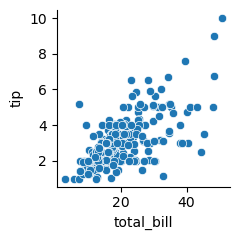

In [31]:
sns.relplot(df,x='total_bill',y='tip',height=2.5)

In [32]:
df.total_bill.corr(df.tip,method='pearson') #total_bill corr tip

0.6757341092113641

In [33]:
df.total_bill.corr(df.tip,method='spearman') 

0.6789681219001009

In [34]:
df.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# สถิติเชิงอนุมาน ( Inferrential Statistics )
    - เป็นการประมาณค่าของสิ่งที่ไม่รู้จากข้อมูลส่วนย่อยที่รู้
    - ข้อมูลที่เรารู้ก็คือข้อมูลที่เราเก็บมาหรือสุ่มตัวอย่างมา เรียกว่า sample
      ex เช่น คะแนนสอบของนักเรียนป.4 ทึ่สุ่มมา 50 คน
    - ตุณลักษณะที่เราไม่รู้คือข้อมูลภาพรวมของประชากรที่เราสุ่มตัวอย่างมา เรียกว่า population (สิ่งที่เราสนใจทั้งหมด)
        ค่าเฉลี่ยคะแนนสอบของนักเรียนป.4 ทั่วประเทศ
        ค่าเฉลี่ยคะแนนสอบของนักเรียนป.4 ในปีหน้า

## Sample vs Population statistic
    การสุ่มตัวอย่างนั้นมีความไม่แน่นอนเข้ามาเกี่ยวข้องด้วย
        การสุ่มแต่ละรอบจะได้กลุ่มตัวอย่างที่ไม่เหมือนกัน
    

In [35]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
df_sample50 = df.sample(50)
df_sample50

,total_bill,tip,sex,smoker,day,time,size
163,13.81,2.00,Male,No,Sun,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
146,18.64,1.36,Female,No,Thur,Lunch,3
6,8.77,2.00,Male,No,Sun,Dinner,2
232,11.61,3.39,Male,No,Sat,Dinner,2
200,18.71,4.00,Male,Yes,Thur,Lunch,3
85,34.83,5.17,Female,No,Thur,Lunch,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
161,12.66,2.50,Male,No,Sun,Dinner,2
223,15.98,3.00,Female,No,Fri,Lunch,3


In [37]:
df_sample50.tip.mean()

2.9058000000000006

In [38]:
df_sample50 = df.sample(50)
df_sample50

,total_bill,tip,sex,smoker,day,time,size
186,20.90,3.50,Female,Yes,Sun,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
130,19.08,1.50,Male,No,Thur,Lunch,2
65,20.08,3.15,Male,No,Sat,Dinner,3
61,13.81,2.00,Male,Yes,Sat,Dinner,2
137,14.15,2.00,Female,No,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
173,31.85,3.18,Male,Yes,Sun,Dinner,2
228,13.28,2.72,Male,No,Sat,Dinner,2


In [39]:
df_sample50.tip.mean()

2.9156

# Law of large numbers
    -ความไม่แน่นอนมีผลต่อกลุ่มตัวอย่างจำนวนน้อยมากกว่ากลุ่มจำนวนมาก
    -กฏ law of large numbers กล่าวว่าถ้าเราสุ่มกลุ่มตัวอย่างมากขึ้นไปเรื่อยๆ ค่าสถิติของกลุ่มตัวอย่าง

In [40]:
ls_10samples = []
for i in range(10):
    df_ = df.sample(10) #สุ่มมา 10 ตย. 
    mean_df = df_.tip.mean() #หาค่า tip.mean ของกลุ่มตัวอย่าง
    ls_10samples.append(mean_df)

In [41]:
ls_10samples

[3.2969999999999997,
 3.07,
 2.1639999999999997,
 2.896,
 3.4219999999999997,
 3.168,
 3.37,
 2.567,
 2.6260000000000003,
 3.2299999999999995]

In [46]:
ls_50samples = []
for i in range(10):
    df_ = df.sample(50)
    mean_df = df_.tip.mean()
    ls_50samples.append(mean_df)

In [47]:
ls_50samples

[2.9924,
 3.263,
 2.7791999999999994,
 3.0610000000000004,
 3.066,
 2.8372,
 2.9962,
 2.997,
 2.9606,
 2.7783999999999995]

## การประมาณค่าที่เอนเอียง
    - biased estimator หมายถึงค่าสถิติที่คำนวณจากกลุ่มตัวอย่างแล้วจะเบี่ยงเบนไปจากค่าของประชากรเสมอ
    แม้ว่าเราจะเพิ่มกลุ่มตัวอย่างไปเรื่อยๆก็ตาม
    -สถิติที่ไม่เอนเอียง เช่นค่าเฉลี่ย
    -สถิติที่เอนเอง
        เช่น variance และ ส่วนเบี่ยงเบนมาตราฐานของกลุ่มตัวอย่างจะประมาณค่าของประชากรต่ำกว่าความเป็นจริง
        สามารถปรับค่า variance ให้ไม่เอนเอียงได้
        ด้วย degree of freedom (ddof ในคำสั่งของ pandas , var.s() ใน excel )
    

ยกตัวอย่าง

    pop have var = 5 
    ทำการสุ่มกลุ่มตัวอย่าง(sample) ถ้าได้ var = 48 
    ถ้าเพิ่มขนาดของ sample ไปเรื่อยๆ ค่าจะเข้าใกล้กลุ่มตัวประชากร
    แต่ถ้ามี biased estimator ถึงจะเพิ่มกลุ่มตัวอย่างก็จะไม่เข้ากลุ่มประชากร

population variance , sample variance ที่ไม่เท่ากันเพราะค่าเฉลี่ย

In [48]:
df_sample50.tip.var() # ของกลุ่่มตัวอย่าง

1.3678251428571429

In [49]:
df_sample50.tip.var(ddof=0) #ของประชากร

1.34046864

In [50]:
df.groupby('sex').tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

ผญให้ tip น้อยกว่า ผช
มันเป็นลักษณะที่ต่างกันระหว่างเพศหรือว่าเป็นเหตุบังเอิญ

# Central limit theorem

In [69]:
df_multi_samples = pd.DataFrame()
for i in range(30):#สุ่ม 100 กลุ่ม
    s = df.tip.sample(50,ignore_index = True) #กลุ่มละ 50 คน
    df_multi_samples = pd.concat([df_multi_samples,s],axis=1)
df_multi_samples.columns = ['sample_'+str(i) for i in (range(1,31))]#การสร้าง list retation

In [70]:
df_multi_samples

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_21,sample_22,sample_23,sample_24,sample_25,sample_26,sample_27,sample_28,sample_29,sample_30
0,3.68,2.88,2.00,3.00,1.00,1.50,3.00,1.17,4.00,3.92,...,3.76,2.88,4.71,2.18,3.00,3.92,2.50,2.75,3.55,5.65
1,4.00,3.40,2.20,2.50,3.16,2.50,3.00,5.00,1.50,1.63,...,1.00,3.00,2.45,1.00,3.39,1.32,3.71,3.40,5.00,3.76
2,1.00,5.00,3.40,2.00,1.97,6.50,4.00,2.50,2.20,3.25,...,5.14,2.50,2.00,2.55,3.00,2.24,3.48,6.50,1.44,1.00
3,3.00,1.25,2.00,4.00,2.50,1.25,2.00,1.97,10.00,2.00,...,2.72,2.00,2.31,3.02,2.74,10.00,5.20,5.00,1.71,3.68
4,2.00,2.00,1.00,3.00,3.07,5.92,4.00,5.60,4.30,2.00,...,3.00,5.15,2.50,1.10,1.92,2.00,2.88,3.00,5.14,2.00
5,6.00,2.61,2.50,3.50,3.00,2.72,1.50,2.88,3.39,3.50,...,2.00,2.00,4.00,3.50,4.06,5.92,1.36,3.00,3.50,2.61
6,2.02,2.00,2.00,2.54,3.00,3.00,1.97,5.17,3.06,2.61,...,2.61,1.97,3.50,1.50,2.00,4.71,3.00,1.01,2.64,1.96
7,5.85,1.47,3.00,3.00,3.23,1.61,7.58,6.50,2.05,2.00,...,1.50,3.50,4.00,3.23,1.64,4.00,5.00,1.25,4.00,1.58
8,2.00,2.00,3.00,5.00,2.24,5.00,3.00,10.00,2.34,2.00,...,2.30,6.50,1.92,2.23,3.00,1.45,2.00,2.03,2.31,3.00
9,3.76,6.50,3.18,2.00,1.67,5.15,2.50,3.50,1.48,3.00,...,1.58,4.08,3.61,2.72,3.92,3.50,3.75,2.00,6.50,2.00


1 column = การสุ่ม 1 ครั้ง จะสุ่มทั้งหมด 30 ครั้ง
จำนวน 50 ค่า

In [71]:
sample_means = df_multi_samples.mean()
sample_means

sample_1     3.1856
sample_2     2.9820
sample_3     3.0402
sample_4     3.1714
sample_5     3.1054
sample_6     2.7570
sample_7     3.2138
sample_8     3.3214
sample_9     3.1456
sample_10    3.0276
sample_11    3.0704
sample_12    2.9570
sample_13    2.8662
sample_14    2.8110
sample_15    2.9230
sample_16    3.0622
sample_17    2.6952
sample_18    2.9430
sample_19    3.0612
sample_20    2.8720
sample_21    2.8720
sample_22    3.1544
sample_23    2.8966
sample_24    2.9466
sample_25    2.9638
sample_26    3.2654
sample_27    3.1012
sample_28    3.0982
sample_29    3.1084
sample_30    3.0638
dtype: float64

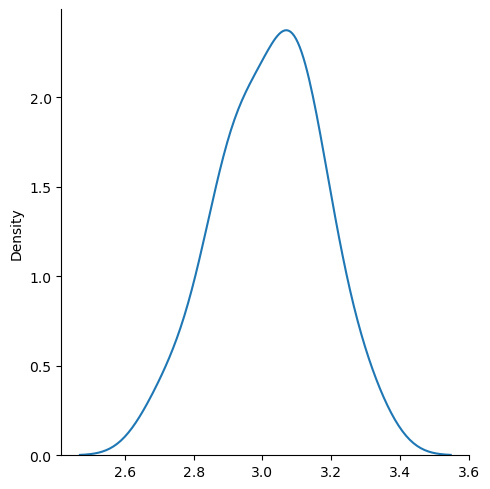

In [72]:
sns.displot(sample_means,kind='kde')

In [75]:
sample_means.mean() #ค่าเฉลี่ยตัวนี้จะเข้าใกล้ประชากรมากขึ้น เรียกว่า ค่าเฉลี่ยของค่า means ของกลุ่มหลายกลุ่ม

3.0227200000000005

# StanDard Error 

In [76]:
sample_means.std(ddof=0) #ถ้าค่าstd ต่ำแสดงว่าค่า mean ในแต่ละรอบจะไม่ค่อยต่างกันมาก 

0.145960584633889

## Standard Error
    เป็นมาตรวัดความน่าเชื่อถือของสถิติของกลุ่มตัวอย่างในการสุ่มครั้งนั้น
        วัดว่าค่าสถิตินี้เบี่ยงเบนจากค่าจริงของประชากรมากน้อยแค่ไหน
    ค่าสถิติคือค่าเฉลี่ย คำนวณ SE ได้จาก standard deviation ของประชากร หารด้วยรากที่สองของจำนวนตัวอย่าง
    : เบี่ยงเบน/ รากที่สองของ n
    
        

In [79]:
df.tip.std(ddof=0)/(50**0.5)

0.1952746021630382

In [80]:
df_multi_samples.iloc[:,0].std(ddof=0)/(50**0.5) 
#50**2 รากที่สองของ 50 : 50คือค่า n คือตัวอย่าง sample

0.22469324155390163

# Confidence Interval
    ช่วงความเชื่อมั่น เป็นการประมาณค่าแบบช่วงเพื่อระบุความคลาดเคลื่อนของสถิติของกลุ่มตย
    เมื่อเราสุ่มหลายกลุ่มตัวอย่างและคำนวณค่าสถิติแล้วหา percentile ที่ 95 และ 5 ของค่าสถิติ

In [81]:
sample_means.sort_values()

sample_17    2.6952
sample_6     2.7570
sample_14    2.8110
sample_13    2.8662
sample_21    2.8720
sample_20    2.8720
sample_23    2.8966
sample_15    2.9230
sample_18    2.9430
sample_24    2.9466
sample_12    2.9570
sample_25    2.9638
sample_2     2.9820
sample_10    3.0276
sample_3     3.0402
sample_19    3.0612
sample_16    3.0622
sample_30    3.0638
sample_11    3.0704
sample_28    3.0982
sample_27    3.1012
sample_5     3.1054
sample_29    3.1084
sample_9     3.1456
sample_22    3.1544
sample_4     3.1714
sample_1     3.1856
sample_7     3.2138
sample_26    3.2654
sample_8     3.3214
dtype: float64

In [82]:
sample_means.quantile([0.05,0.95]) # คำนวณ confidence level 90%

0.05    2.78130
0.95    3.24218
dtype: float64

In [83]:
sample_means.quantile([0.025,0.975])  # คำนวณ confidence level 95%

0.025    2.740005
0.975    3.280800
dtype: float64

# RESAMPLE

In [89]:
one_sample = df.tip.sample(50)
df_resamples = pd.DataFrame()
for i in range(300):#สุ่ม 300 กลุ่ม
    s = one_sample.sample(50,ignore_index = True,replace = True) #กลุ่มละ 50 คน #replace สุ่มออกมาแล้วใส่ค่ากลับไป
    df_resamples = pd.concat([df_resamples,s],axis=1)
df_resamples.columns = ['sample_'+str(i) for i in (range(1,301))]#การสร้าง list retation

In [90]:
df_resamples

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_291,sample_292,sample_293,sample_294,sample_295,sample_296,sample_297,sample_298,sample_299,sample_300
0,4.00,2.64,2.09,3.00,2.09,3.18,2.23,2.09,1.32,5.17,...,2.50,2.09,3.00,5.17,1.00,1.66,2.50,3.18,4.30,1.32
1,2.88,5.00,2.50,2.00,3.68,2.88,4.00,5.65,3.18,3.18,...,1.32,1.00,2.88,1.63,4.00,3.76,1.32,2.45,3.00,1.66
2,1.63,2.00,4.30,6.50,3.00,3.07,2.50,5.00,6.00,1.32,...,3.02,5.00,4.73,1.01,2.09,3.07,3.50,3.00,1.66,2.00
3,2.00,5.17,3.18,4.67,2.50,5.20,1.66,3.31,4.30,6.50,...,2.83,4.30,2.92,2.45,5.65,5.92,2.23,2.23,2.45,6.00
4,3.15,4.67,2.00,4.00,1.50,2.00,1.00,3.50,2.05,5.92,...,3.76,2.00,2.64,2.09,3.07,1.47,2.50,2.31,5.20,5.00
5,4.30,2.88,2.50,2.00,5.65,1.47,3.02,5.65,3.76,3.07,...,1.50,3.18,5.17,4.30,3.00,5.20,2.50,3.15,1.47,4.67
6,2.45,1.00,3.15,1.66,2.05,4.00,6.50,3.18,3.00,3.76,...,3.76,2.50,3.68,1.63,2.88,2.50,2.00,2.50,3.50,1.32
7,5.00,5.20,2.50,2.88,5.00,2.50,2.83,5.20,2.50,1.01,...,1.36,3.68,3.00,2.92,2.00,3.00,3.18,6.50,5.65,2.09
8,1.66,5.17,2.50,4.67,3.18,1.36,5.17,2.50,2.09,3.15,...,4.67,2.05,2.00,2.50,3.00,3.15,1.50,2.00,3.00,2.31
9,3.31,2.64,2.83,5.00,2.92,2.50,4.00,4.00,3.02,2.00,...,2.64,6.00,2.50,4.73,1.66,2.00,2.00,2.00,2.50,1.66


In [92]:
df_resamples.mean().sort_values()

sample_113    2.6598
sample_171    2.6950
sample_126    2.7256
sample_84     2.7418
sample_15     2.7466
               ...  
sample_167    3.6488
sample_18     3.6732
sample_192    3.6836
sample_202    3.7134
sample_256    3.8186
Length: 300, dtype: float64

In [93]:
resample_means = df_resamples.mean()
resample_means

sample_1      3.2730
sample_2      3.3344
sample_3      2.9942
sample_4      2.9064
sample_5      3.2866
               ...  
sample_296    2.9698
sample_297    2.8682
sample_298    3.2332
sample_299    2.8820
sample_300    2.9304
Length: 300, dtype: float64

In [94]:
resample_means.sort_values()

sample_113    2.6598
sample_171    2.6950
sample_126    2.7256
sample_84     2.7418
sample_15     2.7466
               ...  
sample_167    3.6488
sample_18     3.6732
sample_192    3.6836
sample_202    3.7134
sample_256    3.8186
Length: 300, dtype: float64

In [95]:
resample_means.mean()

3.179986

In [96]:
resample_means.std(ddof=0)

0.19942955031121473

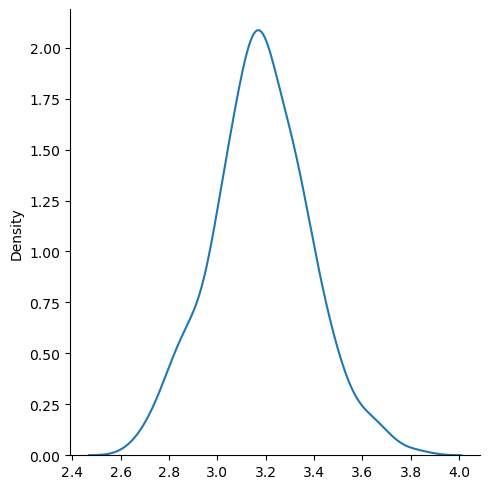

In [97]:
sns.displot(resample_means , kind='kde')

In [98]:
resample_means.quantile([0.05,0.95])

0.05    2.83507
0.95    3.51052
dtype: float64

In [99]:
resample_means.quantile([0.025,0.975])

0.025    2.791445
0.975    3.613335
dtype: float64

# Confidence interval Meaning

In [102]:
one_sample

209    2.23
69     2.09
3      3.31
197    5.00
161    2.50
78     3.00
173    3.18
2      3.50
233    1.47
181    5.65
37     3.07
213    2.50
100    2.50
101    3.00
177    2.00
11     5.00
85     5.17
0      1.01
1      1.66
33     2.45
183    6.50
67     1.00
132    1.50
119    2.92
14     3.02
47     6.00
28     4.30
159    2.00
65     3.15
229    2.88
180    3.68
29     3.00
238    4.67
43     1.32
48     2.05
52     5.20
146    1.36
204    4.00
147    1.63
39     5.00
225    2.50
95     4.73
64     2.64
131    2.83
63     3.76
240    2.00
239    5.92
120    2.31
108    3.76
24     3.18
Name: tip, dtype: float64

In [108]:
from matplotlib import pyplot

<Axes: >

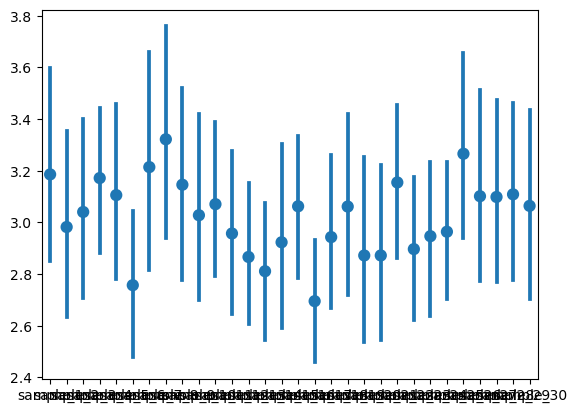

In [105]:
sns.pointplot(df_multi_samples,errorbar=('ci',90),linestyles='none')

    ทำการสุ่มและกระบวนการเหมือนกันหมดเลย
    ความไม่แน่นอนคือการสุ่มตัวอย่างที่ได้
    ความสูงของเส้นคือ Confidence interval
    จุด คือ ค่าเฉลี่ย

    90% ที่คร่อมค่าเฉลี่ยของประชากร
    10% ที่ไม่คร่อมค่าเฉลี่ยของประชากร

    ****ถ้าเราทำซ้ำแบบเดิม 100 ครั้ง แต่ละครั้งหาเฉลี่ยและหาค่า cof. int 
    จะมี cof. inter 90 รอบที่คร่อม 10 รอบไม่คร่อม***

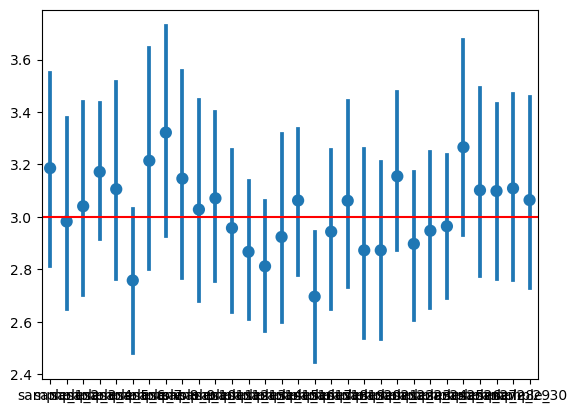

In [109]:
sns.pointplot(df_multi_samples,errorbar=('ci',90),linestyles='none')
pyplot.axhline(df.tip.mean(),color='r') #pyplot แต่ละครั้งจะไม่เหมือนกัน เพราะมันจะใช้ค่าของ resample 

    เส้นสีแดงคือค่าเฉลี่ยของ tip จริงๆ
    ถ้าข้อมูลสุ่มเรา 30 ครั้ง 
    col interval 
    90% คล่อม
    10% ไม่คล่อม --> 3 

### เพราะฉะนั้นต้องการ confidence interval สูงๆ เช่น 90-99% เพราะถ้าไม่คร่อมค่าเฉลี่ยจะลดลง

# การทดสอบสมมติฐาน
    สิ่งที่เห็นเป็นเพียงความบังเอิญหรือไม่
    

## Hypothesis testing

In [111]:
df.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [120]:
g1 = df.groupby('sex').size()[0]
g2 = df.groupby('sex').size()[1]

In [121]:
df.groupby('sex').tip.mean().diff()

sex
Female        NaN
Male      0.25617
Name: tip, dtype: float64

In [122]:
diff_tip = df.groupby('sex').tip.mean().diff()[1]

In [123]:
diff_tip

0.2561695585328354

ต้องการตรวจสอบสมมติฐานว่าในการให้ tip เพศมีผลจริงๆหรือไม่

### กระบวนการทดสอบสมมติฐาน
    1.ตั้งสมมติฐาน
    2.หาข้อโต้แย้ง
    3.กำหนดระดับนัยสำคัญเป็นเปอร์เซ็นต์ ค่านิยมที่ใช้ 0.1 --> 10% ,0.05--> 5% ,0.01-->1%

In [133]:
#ค่าความผิดพลาด 
alphe = 0.1 

In [134]:
df_g1 = df.sample(g1)
df_g1

,total_bill,tip,sex,smoker,day,time,size
145,8.35,1.50,Female,No,Thur,Lunch,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
177,14.48,2.00,Male,Yes,Sun,Dinner,2
...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2
40,16.04,2.24,Male,No,Sat,Dinner,3
118,12.43,1.80,Female,No,Thur,Lunch,2
205,16.47,3.23,Female,Yes,Thur,Lunch,3


In [135]:
df_g2 = df.drop(df_g1.index)
df_g2

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
242,17.82,1.75,Male,No,Sat,Dinner,2


In [136]:
g2_mean = df_g2.tip.mean()
g2_mean

3.0096178343949043

In [137]:
g1_mean = df_g1.tip.mean()
g1_mean

2.9778160919540237

In [138]:
g2_mean - g1_mean

0.03180174244088052

In [139]:
diff_s = [] #list ที่เราจะเก็บความแตกต่าง
for i in range(1000):#ทำซ้ำ1000 รอบ
    df_g1 = df.sample(g1)
    df_g2 = df.drop(df_g1.index)
    g2_mean = df_g2.tip.mean()
    g1_mean = df_g1.tip.mean()
    diff_s.append(g2_mean-g1_mean) #บันทึกไว้ในdiff_s


    

In [140]:
diff_s = pd.Series(diff_s)
diff_s

0     -0.335654
1      0.111652
2      0.110759
3     -0.034294
4      0.157383
         ...   
995    0.165958
996    0.215440
997    0.021798
998    0.065028
999    0.257777
Length: 1000, dtype: float64

จะเห็นว่าบางครั้งจะมีกลุ่มที่ 2 มากกว่ากลุ่มที่ 1 มากกว่า 0.256 
ต้องพิจารณาว่าค่า error กี่ครั้งที่สามารถยอมรับได้ 

In [141]:
(diff_s >= diff_tip).sum() #มีครั้งไหนที่diff_s >= diff_tip

75

In [142]:
(diff_s >= diff_tip).sum()/len(diff_s) #ค่าError = 0.075 น้อยกว่าค่าที่เราต้อง alpha = 0.01

0.075

### สรุปว่าผชให้ทริปมากกว่าผญไม่ใช่เรื่องบังเอิญ

## ** A/B Testing 
แบ่งกลุ่มตัวอย่างและนำมาเทียบผล
ในเชิง DataSci จะทำA/B testing 

เช่น ต้องการเปลี่ยนหน้าเว็ปสร้างอันใหม่และเทสกับอันเก่า
สุ่มให้คนเข้าไปทั้งเก่าและใหม่
ดูว่าลูกค้าเข้าแล้วเว็ปไหนมีคนซื้อมากกว่ากัน
และก็นำมาทดสอบสมมติฐาน